In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from openbb import obb

# Set API key
obb.user.credentials.fmp_api_key = "JI198J9ADpdcD2yJ4kd8Zl0RAP1goenk"

# Parameters
symbol = "AAPL"
start_date = "2024-01-01"
window = 20
num_std = 2

# Fetch historical data
data = obb.equity.price.historical(
    symbol=symbol,
    start_date=start_date,
    provider="fmp"
).to_df()

# Set index to datetime
data.index = pd.to_datetime(data.index)
data = data.sort_index()

# Use 'close' column
price_col = 'close'

/Users/Sugi/Downloads/SoS-25-Algorithmic-Trading/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Calculate Bollinger Bands
data['Middle Band'] = data[price_col].rolling(window=window).mean()
data['Std Dev'] = data[price_col].rolling(window=window).std()
data['Upper Band'] = data['Middle Band'] + num_std * data['Std Dev']
data['Lower Band'] = data['Middle Band'] - num_std * data['Std Dev']

# Generate mean reversion signals
data['Signal'] = 0
data['Signal'] = np.where(data[price_col] < data['Lower Band'], 1, data['Signal'])   # Buy
data['Signal'] = np.where(data[price_col] > data['Upper Band'], -1, data['Signal']) # Sell
data['Position'] = data['Signal'].shift(1)

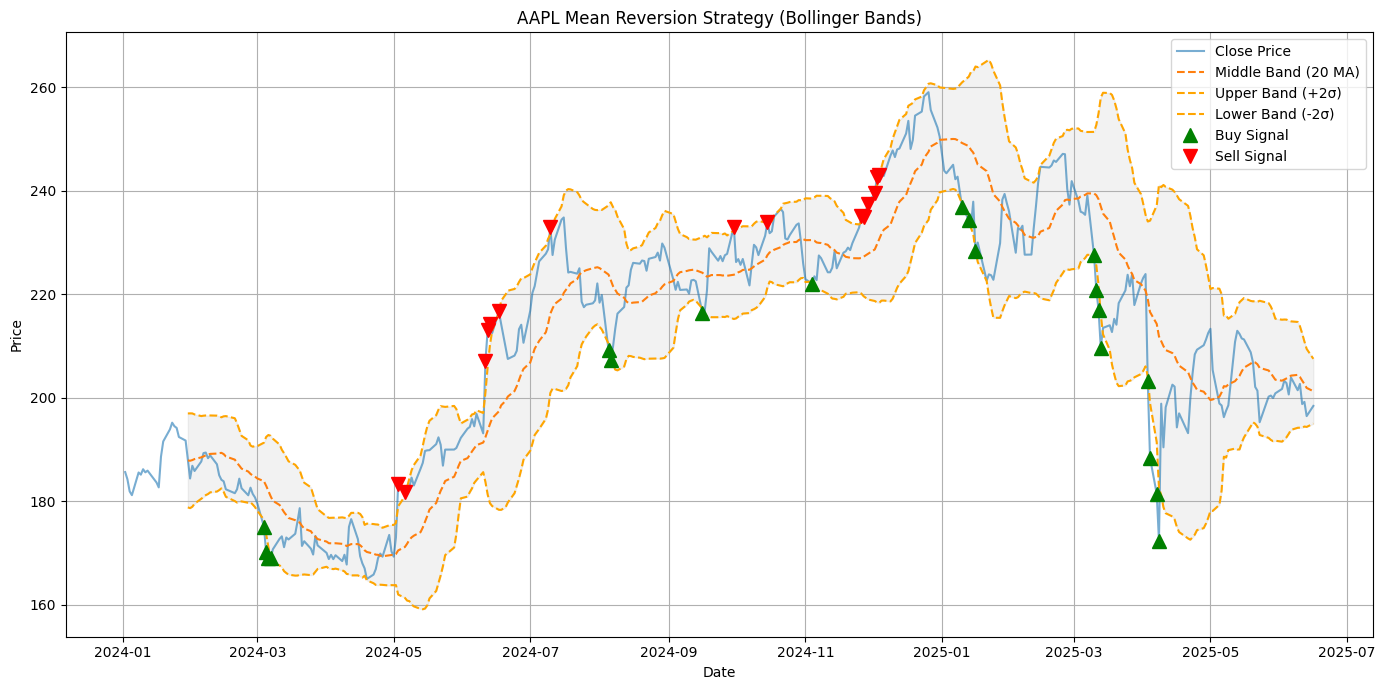

In [3]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data[price_col], label='Close Price', alpha=0.6)
plt.plot(data.index, data['Middle Band'], label='Middle Band (20 MA)', linestyle='--')
plt.plot(data.index, data['Upper Band'], label='Upper Band (+2σ)', linestyle='--', color='orange')
plt.plot(data.index, data['Lower Band'], label='Lower Band (-2σ)', linestyle='--', color='orange')

# Buy/Sell markers
plt.plot(data[data['Signal'] == 1].index, data[price_col][data['Signal'] == 1], '^', markersize=10, color='green', label='Buy Signal')
plt.plot(data[data['Signal'] == -1].index, data[price_col][data['Signal'] == -1], 'v', markersize=10, color='red', label='Sell Signal')

plt.fill_between(data.index, data['Lower Band'], data['Upper Band'], color='gray', alpha=0.1)
plt.title(f"{symbol} Mean Reversion Strategy (Bollinger Bands)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()